In [1]:
#week 1 : project introduction and Data collection 
#Build a simple movie recommendation system using MovieLens dataset. We aim to explore both content-based and collaborative filtering methods to suggest movies to users based on their past preferences and genres.
# import the dataset
import csv
with open("tmdb_5000_credits.csv", mode="r") as csvfile:
    m= list(csv.DictReader(csvfile))    

In [2]:
#import the second dataset
import pandas as pd
df = pd.read_csv("tmdb_5000_movies.csv")     

In [3]:
# Convert 'movie_id' to integer so we can successfully merge it with the 'id' column in the main movies DataFrame
m_df = pd.DataFrame(m)
m_df['movie_id'] = m_df['movie_id'].astype(int)

# Merge the two datasets
merged_df = pd.merge(df, m_df, suffixes=('_movies', '_credits'), left_on='id', right_on='movie_id', how='inner')
# Display the first few rows of the merged dataset
print(merged_df.head())




      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [ ]:
#get the merged  data information 
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
#get the merged data description
print(merged_df.describe())

             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count       movie_id  
count   4803.000000   4803.000000    4803.000000  
mean       6.092172    690.217989   57165.484281  
std        1.194612   1234.585891   88694.614033  
min        0.000000      0.000000       5.000000  
25%        5.600000     54.000000    9014.

Missing values in each column:
homepage        3091
overview           3
release_date       1
tagline          844
dtype: int64

Data types in the dataset:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_movies             object
vote_average            float64
vote_count                int64
movie_id                  int64
title_credits            object
cast                     object
crew                     object
dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_17436\3789764614.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['runtime'].fillna(mean_runtime, inplace=True)


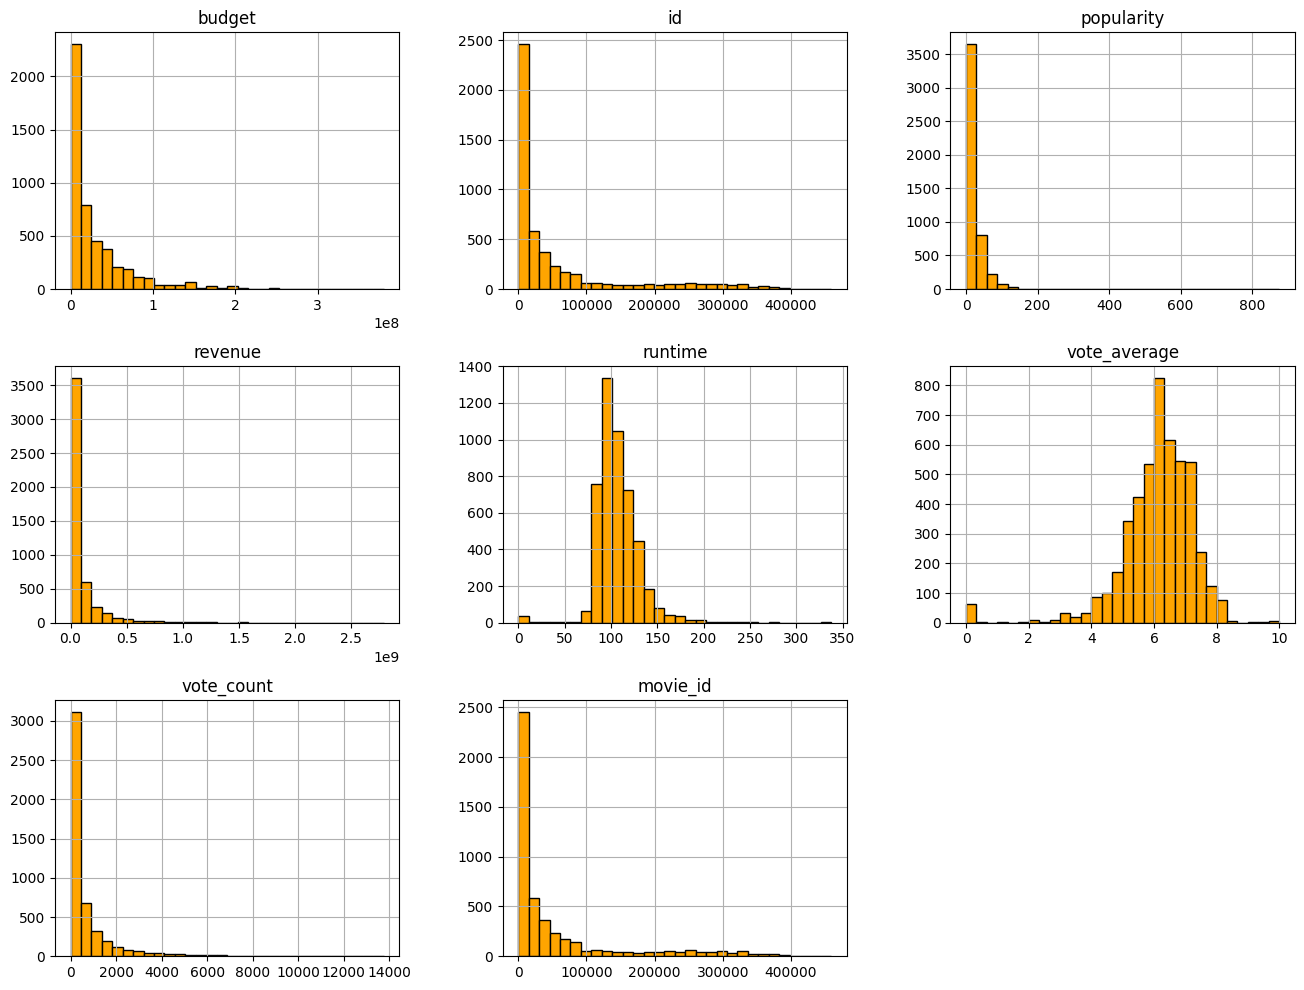

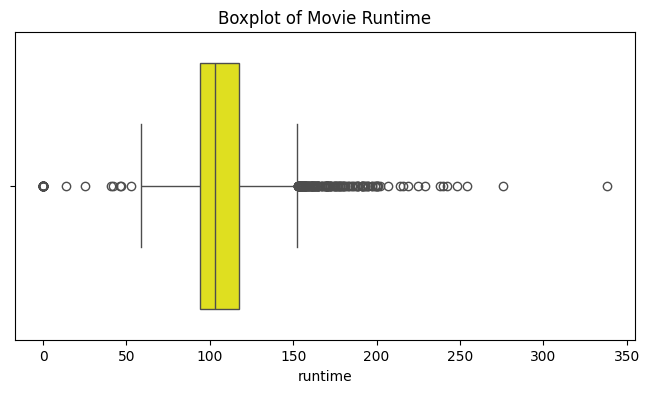

In [14]:
#week 2 : Data exploration and cleaning 
#Objective: perform Exploratory Data Analysisis (EDA)and clean the dataset 

import matplotlib.pyplot as plt
import seaborn as sns

#check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()
# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values[missing_values > 0])

#Handling missing values
# Fill missing values in 'runtime' with the mean runtime
mean_runtime = merged_df['runtime'].mean()
merged_df['runtime'].fillna(mean_runtime, inplace=True)


#Check data types
print("\nData types in the dataset:")
print(merged_df.dtypes)

#visualize the numerical distribution of the merged dataset
merged_df.hist(figsize=(16, 12), bins=30, edgecolor='black', color="orange")
plt.show(block=True)

# Detect outliers using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=merged_df, x='runtime', color='Yellow')
plt.title("Boxplot of Movie Runtime")
plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_17436\4163269529.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_features_df['runtime'].fillna(selected_features_df['runtime'].mean(), inplace=True)


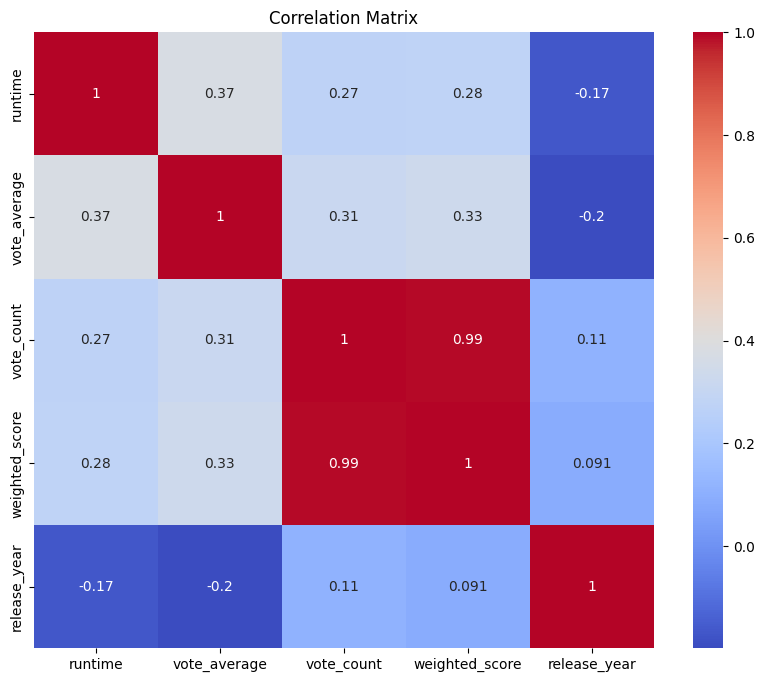

X_train shape: (3842, 5)
X_test shape: (961, 5)
y_train shape: (3842,)
y_test shape: (961,)


In [15]:
# Week 3: Feature Engineering and Selection

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load  merged dataset
# Select relevant features
features = ['id', 'title_movies', 'genres', 'keywords', 'cast', 'crew', 'release_date', 
            'runtime', 'vote_average', 'vote_count']

selected_features_df = merged_df[features].copy()

# Feature Engineering (Create new features)

# Weighted score = vote_average * vote_count
selected_features_df['weighted_score'] = selected_features_df['vote_average'] * selected_features_df['vote_count']

# 4.2 Extract release year from release_date
selected_features_df['release_date'] = pd.to_datetime(selected_features_df['release_date'], errors='coerce')
selected_features_df['release_year'] = selected_features_df['release_date'].dt.year

#  Handle missing values
# Fill missing runtimes with the mean
selected_features_df['runtime'].fillna(selected_features_df['runtime'].mean(), inplace=True)
# Drop rows where 'vote_average' or 'vote_count' is missing (since they're our targets/features)
selected_features_df.dropna(subset=['vote_average', 'vote_count'], inplace=True)

#  Correlation Analysis (Feature Selection)
plt.figure(figsize=(10, 8))
sns.heatmap(selected_features_df[['runtime', 'vote_average', 'vote_count', 'weighted_score', 'release_year']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Encode Categorical Variables
# Let's encode 'genres' using LabelEncoder (simplified). For full one-hot, you'd need preprocessing.
le = LabelEncoder()
selected_features_df['genres_encoded'] = le.fit_transform(selected_features_df['genres'].astype(str))

# Define Features and Target
# Let's say we are predicting vote_average
X = selected_features_df[['runtime', 'vote_count', 'weighted_score', 'release_year', 'genres_encoded']]
y = selected_features_df['vote_average']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape) 


In [6]:
#Week 4: Model Building

# Import necessary libraries
import pandas as pd
import ast
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv("tmdb_5000_movies.csv")

#  Convert genre strings to lists of genre names
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre.get("name", "") for genre in genres]
    except:
        return []

#  Apply the genre extraction function
df['genre_list'] = df['genres'].apply(extract_genres)

#  Create one-hot encoded genre columns
genre_dummies = df['genre_list'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Merge the one-hot encoded genres into the main DataFrame
df_with_genres = pd.concat([df, genre_dummies], axis=1)

#  a matrix using genre columns
genre_matrix = df_with_genres[genre_dummies.columns]

#  Calculate similarity between movies using cosine similarity
similarity = cosine_similarity(genre_matrix)

#  Define the recommendation function
def recommend_movies(movie_title, df, similarity_matrix, top_n=5):
    if movie_title not in df['title'].values:
        return f"Movie '{movie_title}' not found."
    
    # Find index of the selected movie
    idx = df[df['title'] == movie_title].index[0]
    
    # Get similarity scores for this movie
    scores = list(enumerate(similarity_matrix[idx]))
    
    # Sort scores and get top N similar movies (excluding itself)
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    # Get movie titles for top matches
    movie_indices = [i[0] for i in scores]
    return df['title'].iloc[movie_indices]

# Example: Replace "Avatar" with your desired movie title
# Option 1: Direct input
recommended = recommend_movies("Kenya", df_with_genres, similarity)
print("Recommended movies:")
if isinstance(recommended, str):  # This checks if the result is an error message
    print(recommended)
else:
    for title in recommended:
        print("-", title)

Recommended movies:
Movie 'Kenya' not found.


In [30]:
#Week 5: Evaluation of the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Drop non-numeric and irrelevant columns
columns_to_drop = ['release_date', 'title_movies', 'genres', 'keywords', 'cast', 'crew']
X = selected_features_df_clean.drop(columns=columns_to_drop + ['vote_average', 'vote_average_binned'])

# Use numeric target
y = selected_features_df_clean['vote_average_binned']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Convert predicted continuous values into bins (same as labels)
bins = [0, 5, 6, 7, 8, 10]
labels = [1, 2, 3, 4, 5]
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binned)
precision = precision_score(y_test, y_pred_binned, average='weighted')
recall = recall_score(y_test, y_pred_binned, average='weighted')
f1 = f1_score(y_test, y_pred_binned, average='weighted')

# Show the results
print("✅ Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



✅ Evaluation Metrics:
Accuracy: 0.12
Precision: 0.01
Recall: 0.12
F1 Score: 0.03


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# Check the shapes of training data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Check the types of features
print("\nX_train data types:")
print(X_train.dtypes)

# Show first few rows of X_train and y_train
print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nFirst few values of y_train:")
print(y_train.head())

X_train shape: (3792, 19566)
y_train shape: (3792,)

X_train data types:
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
#streamlit 
# Import necessary libraries
import streamlit as st               # Streamlit for building the web app
import pandas as pd                # Pandas for data manipulation
import ast                         # For safely evaluating genre strings in JSON format
from sklearn.metrics.pairwise import cosine_similarity  # For calculating similarity

# Function to convert genre string to a list of genre names
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        if isinstance(genres, list):
              return[genre.get("name", "") for genre in genres]
    except (ValueError, SyntaxError):
        pass
    return[]

# Load and preprocess the dataset
df = pd.read_csv('tmdb_5000_movies.csv')

# Create a new column with the extracted genres
df['genre_list'] = df['genres'].apply(extract_genres)

# One-hot encode the genre list into dummy variables
genre_dummies = df['genre_list'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Merge the dummy variables into the original DataFrame
df_with_genres = pd.concat([df, genre_dummies], axis=1)

# Create a genre matrix and compute cosine similarity
genre_matrix = df_with_genres[genre_dummies.columns]
similarity = cosine_similarity(genre_matrix)

# Movie recommendation function
def recommend_movies(movie_title, top_n=5):
    if movie_title not in df_with_genres['title'].values:
        return []
    idx = df_with_genres[df_with_genres['title'] == movie_title].index[0]
    scores = list(enumerate(similarity[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in scores]
    return df_with_genres.iloc[movie_indices]

# Streamlit UI setup
st.set_page_config(page_title="Movie Recommender", layout="wide")

# App Title
st.title("Movie Recommendation App")

# ℹ Sidebar Info
with st.sidebar:
    st.header("ℹ About")
    st.markdown("""
    This app recommends movies based on genre similarity using cosine similarity.

    - Dataset: TMDB 5000 Movies
    - Method: Genre-based similarity
    """)

# User selects a movie
selected_movie = st.selectbox("Choose a movie:", df_with_genres['title'].sort_values().unique())
# Recommend button
if st.button("Recommend"):
    recommendations = recommend_movies(selected_movie)

    if len(recommendations) > 0:
        st.subheader(f"Top 5 movies similar to: **{selected_movie}**")
        for _, row in recommendations.iterrows():
            st.markdown(f"**{row['title']}**")
            st.markdown(f"Release Date: `{row['release_date']}`")
            st.markdown(f"Genres: `{', '.join(row['genre_list'])}`")
            st.markdown("---")
    else:
        st.warning("⚠️ Movie not found or not enough data to recommend.")


2025-08-04 16:59:32.505 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 16:59:32.509 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 16:59:34.582 
  command:

    streamlit run C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-04 16:59:34.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 16:59:34.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 16:59:34.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 16